<a href="https://colab.research.google.com/github/Wanita-8943/Main_Project/blob/main/A12_Predict_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np

In [28]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [29]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/Regression/All/12Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [30]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/Regression/All/12Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')
height = width = model.input_shape[1]

In [31]:
df = pd.read_csv (f'/content/drive/MyDrive/cut_panoramic/Data/All_Re.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,1,1,7,Y07F,1,V1.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
1,2,1,7,Y07F,1,Flip_V1.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
2,3,2,7,Y07F,1,V2.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
3,4,2,7,Y07F,1,Flip_V2.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
4,5,3,7,Y07F,1,V3.jpg,/content/drive/My Drive/TVT_Gender/train/Femal...,Female,Both
...,...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4746,122,78,25,Y25M,19,J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both
4747,123,78,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4748,124,79,25,Y25M,19,J465.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both


In [32]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [33]:
DATA_PATH = "/content/drive/My Drive/TVT_Gender"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/TVT_Gender/train
/content/drive/My Drive/TVT_Gender/test


In [34]:
# base_dir = '/content/drive/MyDrive/TVT_Gender'
# os.makedirs(base_dir, exist_ok=True)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir, exist_ok=True)
# validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir, exist_ok=True)
# test_dir = os.path.join(base_dir, 'test')
# # os.makedirs(test_dir, exist_ok=True)

In [35]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Class_Re',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 2850 validated image filenames.


In [36]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,51,7,Y07F,1,V67.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
101,102,51,7,Y07F,1,Flip_V67.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
102,103,52,7,Y07F,1,V68.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
103,104,52,7,Y07F,1,Flip_V68.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
104,105,53,7,Y07F,1,V69.jpg,/content/drive/My Drive/TVT_Gender/test/Female...,Female,Both
...,...,...,...,...,...,...,...,...,...
4745,121,77,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4746,122,78,25,Y25M,19,J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both
4747,123,78,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/TVT_Gender/test/Male/F...,Male,Both
4748,124,79,25,Y25M,19,J465.jpg,/content/drive/My Drive/TVT_Gender/test/Male/J...,Male,Both


In [37]:
act = test['Class_Re'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [38]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [39]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


2.1788306

In [40]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 56ms/step


In [41]:
pred_list

[2.1788306,
 1.9841113,
 1.8258595,
 1.8258433,
 1.8968797,
 2.035603,
 1.825851,
 1.826189,
 1.8258429,
 8.287028,
 1.8698916,
 1.8258414,
 1.8258414,
 2.6120582,
 8.286457,
 8.286707,
 1.8258414,
 1.8258424,
 8.286988,
 1.9448657,
 1.838172,
 1.8258519,
 1.8258414,
 1.8258414,
 8.287001,
 2.5836477,
 2.241302,
 8.287028,
 8.287028,
 8.287028,
 8.287028,
 2.442636,
 2.1912837,
 2.4715815,
 2.4864373,
 2.8299665,
 3.1799693,
 2.5033627,
 2.8345437,
 2.3998785,
 2.325397,
 1.9789453,
 2.2580838,
 3.088365,
 2.8270097,
 2.9802427,
 2.998046,
 1.8425655,
 1.8258433,
 2.5619597,
 3.3096685,
 3.7287602,
 2.8155775,
 2.9361129,
 3.7330666,
 3.6790028,
 2.1550035,
 2.458005,
 3.6190977,
 3.2108965,
 2.6404114,
 2.5597444,
 2.656014,
 2.8086085,
 3.1008458,
 2.7433171,
 2.7904367,
 3.0480409,
 3.0977087,
 2.0973144,
 2.6261134,
 2.8863602,
 2.4915748,
 2.7886782,
 3.2895823,
 3.282446,
 4.2605762,
 3.633193,
 4.7018313,
 4.5589447,
 3.0689645,
 3.1196098,
 2.4516234,
 2.2581425,
 4.1872253,
 4

In [42]:
print(type(pred_list))

<class 'list'>


In [43]:
pred_int = np.around(pred_list)

In [44]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [45]:
pred

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  8.,  2.,  2.,  2.,
        3.,  8.,  8.,  2.,  2.,  8.,  2.,  2.,  2.,  2.,  2.,  8.,  3.,
        2.,  8.,  8.,  8.,  8.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  2.,  2.,  3.,  3.,  4.,
        3.,  3.,  4.,  4.,  2.,  2.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  2.,  3.,  3.,  2.,  3.,  3.,  3.,  4.,  4.,
        5.,  5.,  3.,  3.,  2.,  2.,  4.,  4.,  3.,  3.,  4.,  4.,  4.,
        3.,  3.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,
        4.,  4.,  5.,  3.,  3.,  4.,  5.,  4.,  4.,  4.,  4.,  4.,  5.,
        4.,  4.,  5.,  5.,  6.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,
        5.,  4.,  5.,  5.,  5.,  6.,  5.,  5.,  6.,  5.,  6.,  5.,  4.,
        5.,  5.,  6.,  5.,  6.,  5.,  5.,  7.,  7.,  6.,  6.,  7.,  8.,
        4.,  4.,  8.,  8.,  5.,  5.,  9.,  8.,  7.,  8.,  9.,  7.,  7.,
        6.,  6.,  6.,  6.,  7.,  5., 10.,  5.,  5., 11., 11.,  7

#confusion_matrix

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 22.42105263157895%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.33      0.56      0.41        50
           3       0.44      0.72      0.55        50
           4       0.29      0.40      0.33        50
           5       0.25      0.36      0.29        50
           6       0.21      0.20      0.21        50
           7       0.42      0.30      0.35        50
           8       0.09      0.08      0.09        50
           9       0.19      0.12      0.15        50
          10       0.31      0.28      0.29        50
          11       0.29      0.26      0.27        50
          12       0.16      0.18      0.17        50
          13       0.07      0.08      0.07        50
          14       0.06      0.06      0.06        50
          15       0.12      0.20      0.15        50
          16       0.12      0.22      0.16        50
          17       0.11      0.08      0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

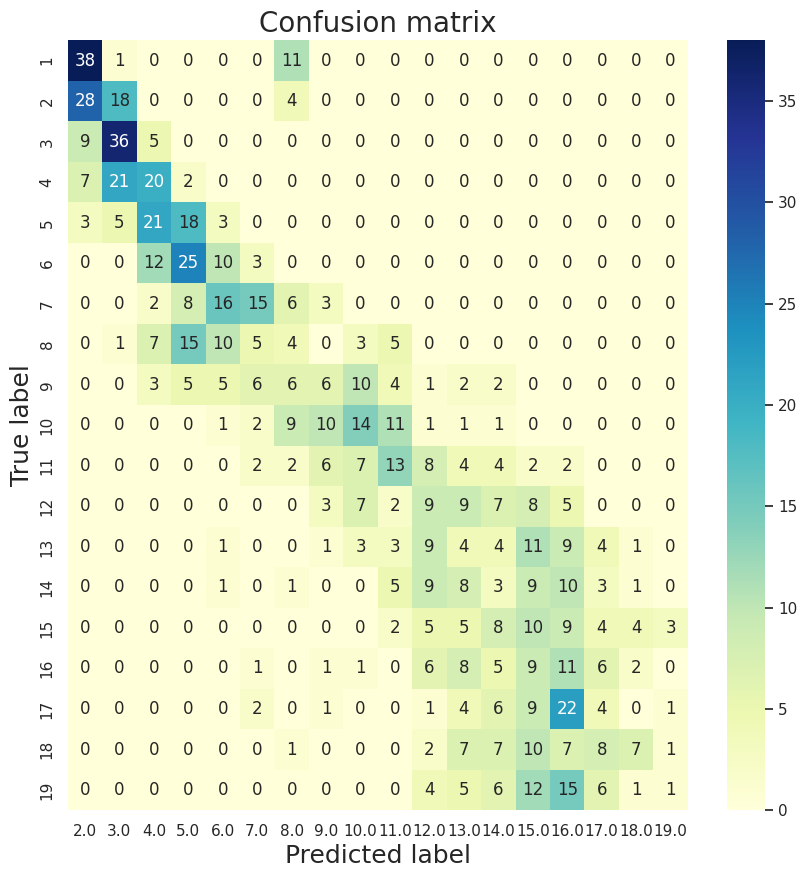

In [47]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [48]:
# from sklearn import metrics

#MAE, MSE and RMSE

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.7294736842105263
MSE: 5.773684210526316
RMSE: 2.4028491859720025
